In [1]:
import pandas as pd
import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

from seaborn import violinplot
from seaborn import boxplot
from seaborn import histplot
from seaborn import countplot

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

##### O DataSet a ser analisado será o "Performance de estudantes", onde reúne alguns parâmetros de à classe social e notas em diferentes provas (matemática e português) de alunos reais de duas escolas brasileiras (Gabriel Pereira e Mousinho da Silveira), no ano de 2008.

##### O objetivo desta análise é entender melhor quais fatores podem contribuir mais para um determinado aluno conseguir ter um desempenho e aprendizado melhor, assim como poder prever, com um modelo simples, as notas mais prováveis de um aluno ter quando preenchendo alguns parâmetros.

##### Este DataSet foi retirado do website [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu), e pode ser acessado por este [LINK](https://archive.ics.uci.edu/dataset/320/student+performance).

### Sumário

> 1..........................Importação dos DataSets
>
> 1.1.......................Definição de Funções
> 
> 2..........................Dicionário de Colunas
>
> 3..........................Preparação dos Dados
>
> 4..........................Uma análise exploratória
>
> 4.1.......................Algumas análises Univariadas
>
> 4.2.......................Algumas análises Bivariadas

### Sumário de Imagens

> Gráfico 1 - Barras - Quantidade de cada gênero.
>
> Gráfico 2 - Hisograma - Frequência de cada nota por trimestre.
>
> Gráfico 3 - Boxplot - Outliers de falta.
>
> Gráfico 4 - Violino - Frequência de Notas por tipo de endereço.
>
> Gráfico 5 - Violino - Frequência de Notas por tempo de deslocamento.
>
> Gráfico 6 - Violino - Frequência de Notas por suporte educacional.
>
> Gráfico 7 - Violino - Frequência de Notas por relação familiar.
>
> Gráfico 8 - Violino - Frequência de Notas por tamanho da família.
>
> Gráfico 9 - Mapa de Calor - Correlação das variáveis numéricas de Matemática.
>
> Gráfico 10 - Mapa de Calor - Correlação das variáveis numéricas de Português.

# 1 - Importação dos DataSets

##### Após fazer a importação dos datasets, podemos ver qual a cara dos dados, como estão escritas variáveis categóricas, se há caracteres especiais, assim como utilizar funções que nos dê uma idéia de dados faltantes.

##### No caso, podemos contar que estes datasets tem 1000 registros no total, e nenhum dos dados está nulo ou faltante, facilitando assim os próximos passos.

In [17]:
df_mat = pd.read_csv("data/student-mat.csv", sep=';')
df_por = pd.read_csv("data/student-por.csv", sep=';')
dfs = [df_mat, df_por]

In [10]:
df_mat.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11


In [11]:
df_por.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13


In [ ]:
print("df_mat Info\n")
print(df_mat.info())
print("\n\ndf_por Info\n")
print(df_por.info())

In [ ]:
print("df_mat Quantidade Nulos\n")
print(df_mat.isnull().sum())
print("\n\ndf_por Quantidade Nulos\n")
print(df_por.isnull().sum())

### 1.1 Definição de Funções

In [112]:
def showViolinPlot(var):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))

    sns.violinplot(x=var, y='G1', data=df_mat, ax=axes[0][0])
    sns.violinplot(x=var, y='G2', data=df_mat, ax=axes[0][1])
    sns.violinplot(x=var, y='G3', data=df_mat, ax=axes[0][2])

    sns.violinplot(x=var, y='G1', data=df_por, ax=axes[1][0])
    sns.violinplot(x=var, y='G2', data=df_por, ax=axes[1][1])
    sns.violinplot(x=var, y='G3', data=df_por, ax=axes[1][2])

    for i in range(0, 2):
        for j in range(0, 3):
            axes[i][j].set_xlabel("")

    axes[0][0].set_ylabel("Nota  1º  Trimestre  -  Matematica")
    axes[0][1].set_ylabel("Nota  2º  Trimestre  -  Matematica")
    axes[0][2].set_ylabel("Nota  3º  Trimestre  -  Matematica")
    axes[1][0].set_ylabel("Nota  1º  Trimestre  -  Portugues")
    axes[1][1].set_ylabel("Nota  2º  Trimestre  -  Portugues")
    axes[1][2].set_ylabel("Nota  3º  Trimestre  -  Portugues")

    plt.tight_layout(w_pad=4, h_pad=2)
    plt.show()

In [120]:
def showHeatmap(df, subject, colorPallete):
    plt.figure(figsize=(14,9))
    num = df.select_dtypes(include=['float', 'int'])
    corr = num.corr()
    matrix = np.triu(corr)
    sns.heatmap(corr, annot=True, cmap=colorPallete, mask=matrix)
    plt.title("Mapa de Calor de Correlações - " + subject, fontsize=15)
    plt.xticks(rotation=35)
    plt.yticks(rotation=0)
    plt.show()

In [133]:
def showGenderQty(df):

    bar = df['sex'].value_counts().reset_index()
    percentages = bar['count'] / bar['count'].sum() * 100

    plt.grid(False)

    return bar, percentages

# 2 - Dicionário de Colunas

#### Para o melhor entendimento do que cada uma das categorias significa no contexto da análise, é necessário um dicionário de cada uma das colunas

1) **school** - Escola ("GP" = Gabriel Pereira / "MS" = Mousinho da Silveira)

2) **sex** - Genero ("F" = Feminino / "M" = Masculino)
3) **age** - Idade do aluno
4) **address** - Tipo do endereço ("U" = Urbano / "R" = Rural)
5) **famsize** - Tamanho da Família ("LE3" = 3 Pessoas ou menos / "GT3" = Mais que 3 pessoas)
6) **Pstatus** - Estatus dos pais ("J" = Morando juntos / "S" = Separados)
7) **Medu** - Educação da Mãe (0 = Nenhum / 1 = Fundamental / 2 = Quinto até Nono ano / 3 = Colégio / 4 = Ensino Superior)
8) **Fedu** - Educação do Pai (0 = Nenhum / 1 = Fundamental / 2 = Quinto até Nono ano / 3 = Colégio / 4 = Ensino Superior)
9) **Mjob** - Ocupação da Mãe (Professor / Saúde / Func. Público / Lar / Outro)
10) **Fjob** - Ocupação do Pai (Professor / Saúde / Func. Público / Lar / Outro)
11) **reason** - Razão para escolher a escola ("Local" = Perto de casa / Reputação / "Curso" = Preferencia de curso / Outro)
12) **guardian** - Guarda do estudante
13) **traveltime** - Tempo de casa até a escola (1 = Menos que 15 min / 2 = 15 a 30 min / 3 = 30 min a 1 hora / 4 = Maior que 1 hora)
14) **studytime** - Tempo semanal de estudo (1 = Menos que 2 horas / 2 = 2 a 5 horas / 3 = 5 a 10 horas / 4 = Mais que 10 horas)
15) **failures** - Número de vezes que o aluno repetiu de ano
16) **schoolsup** - Teve suporte educacional extra (Sim ou Não)
17) **famsup** - Teve suporte educacional familiar (Sim ou Não)
18) **paid** - Teve aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (Sim ou Não)
19) **activities** - Teve atividades extracurriculares (Sim ou Não)
20) **nursery** - Frequentou creche (Sim ou Não)
21) **higher** - Deseja cursar ensino superior (Sim ou Não)
22) **internet** - Tem acesso à internet em casa (Sim ou Não)
23) **romantic** - Está em um relacionamento amoroso (Sim ou Não)
24) **famrel** - Qualidade das relações familiares (De 1 = Muito ruim até 5 = Excelente)
25) **freetime** - Tem tempo extra depois da escola (De 1 = Muito baixo até 5 = Muito alto)
26) **goout** - Sai com os amigos (De 1 = Muito baixo até 5 = Muito alto)
27) **Dalc** - Consumo de álcool durante a semana (De 1 = Muito baixo até 5 = Muito alto)
28) **Walc** - Consumo de álcool no final de semana (De 1 = Muito baixo até 5 = Muito alto)
29) **health** - Estado de saúde atual (De 1 = Muito baixo até 5 = Muito alto)
30) **absences** - Número de faltas na escola
31) **G1** - Nota do primeiro trimestre (De 0 a 20)
31) **G2** - Nota do segundo trimestre (De 0 a 20)
32) **G3** - Nota final (terceiro trimestre) (De 0 a 20)

# 3 - Preparação dos dados

##### Não sendo necessário fazer nenmhum tratamento referente à dados faltantes, podemos tratar as variáveis categóricas

##### Vamos realizar algumas preparações, como abreviações, traduções, mudanças que não causarão impacto à integridade dos dados, a fim de apenas facilitar o entendimento.

In [19]:
for i in (dfs):
    i['Pstatus'] = i['Pstatus'].str.replace("A", "S").str.replace("T", "J")
    i['sex'] = i['sex'].str.replace("M", "Masculino").str.replace("F", "Feminino")
    i['address'] = i['address'].str.replace("R", "Rural").str.replace("U", "Urbano")
    i['Mjob'] = i['Mjob'].str.replace("at_home", "Lar").str.replace("health", "Saude").str.replace("other", "Outro").str.replace("services", "Func. Publico").str.replace("teacher", "Professor")
    i['Fjob'] = i['Fjob'].str.replace("at_home", "Lar").str.replace("health", "Saude").str.replace("other", "Outro").str.replace("services", "Func. Publico").str.replace("teacher", "Professor")
    i['reason'] = i['reason'].str.replace("home", "Local").str.replace("reputation", "Reputacao").str.replace("course", "Curso").str.replace("other", "Outro")
    i['guardian'] = i['guardian'].str.replace("mother", "Mae").str.replace("father", "Pai").str.replace("other", "Outro")

    i['schoolsup'] = i['schoolsup'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['famsup'] = i['famsup'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['paid'] = i['paid'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['activities'] = i['activities'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['nursery'] = i['nursery'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['higher'] = i['higher'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['internet'] = i['internet'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['romantic'] = i['romantic'].str.replace("yes", "Sim").str.replace("no", "Nao")

# 4 - Uma análise exploratória

### 4.1 - Algumas análises Univariadas

##### Iniciaremos a análise vendo algumas variáveis separadamente, como estes dados mostram notas de provas de alunos, as três perguntas iniciais que queremos fazer são:

1) Qual a proporção de homens e mulheres ?
2) Quantas vezes cada nota foi obtida ?
3) Há alguma variável da qual devemos nos preocupar com *outliers*, ou seja, valores muito fora da curva ?

##### Podemos alcançar as respostas das 2 primeiras perguntas com gráficos de barra simples e histogramas. Já a terceira pergunta, baseado no dicionário das variáveis, como a maioria estão numa escala de 1 a 5, não haverão valores fugindo disto, apenas a variável *"absences"* (número de faltas) poderá nos mostrar algum valor discrepante, para ela, usaremos um gráfico de boxplot.

##### Os gráficos de barra abaixo mostram que para matemática, a quantidade de homens e mulheres são bem parecidas, porém em português, uma quantidade um pouco maior de dados de alunas foi coletado

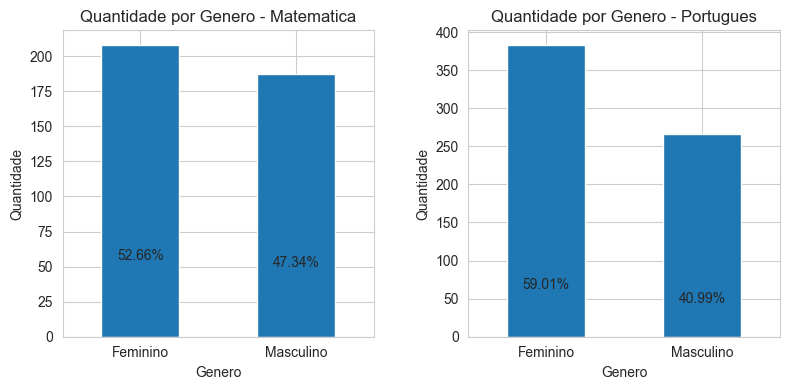

		Gráfico 1 - Barras - Quantidade de cada gênero.


In [130]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

bar_mat = df_mat['sex'].value_counts().reset_index()
percentages = bar_mat['count'] / bar_mat['count'].sum() * 100

bar_mat.plot(kind='bar', x='sex', y='count', ax=axes[0], title='Quantidade por Genero - Matematica', legend=False)

for i in range(0,1):
    for j, percentage in enumerate(percentages):
        axes[i].text(j, percentage, f"{percentage:.2f}%", ha="center", va="bottom")

axes[0].set_xlabel('Genero')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticklabels(["Feminino", "Masculino"], rotation=0)



bar_por = df_por['sex'].value_counts().reset_index()
percentages = bar_por['count'] / bar_por['count'].sum() * 100

bar_por.plot(kind='bar', x='sex', y='count', ax=axes[1], title='Quantidade por Genero - Portugues', legend=False)
axes[1].set_xlabel('Genero')
axes[1].set_ylabel('Quantidade')
axes[1].set_xticklabels(["Feminino", "Masculino"], rotation=0)

for i in range(1,2):
    for j, percentage in enumerate(percentages):
        axes[i].text(j, percentage, f"{percentage:.2f}%", ha="center", va="bottom")


plt.tight_layout(w_pad=3)
plt.show()

print("\t\tGráfico 1 - Barras - Quantidade de cada gênero.")

##### Os 6 histogramas abaixo representam a frequência de cada nota, cada linha representa uma matéria, e cada coluna um trimestre do ano.

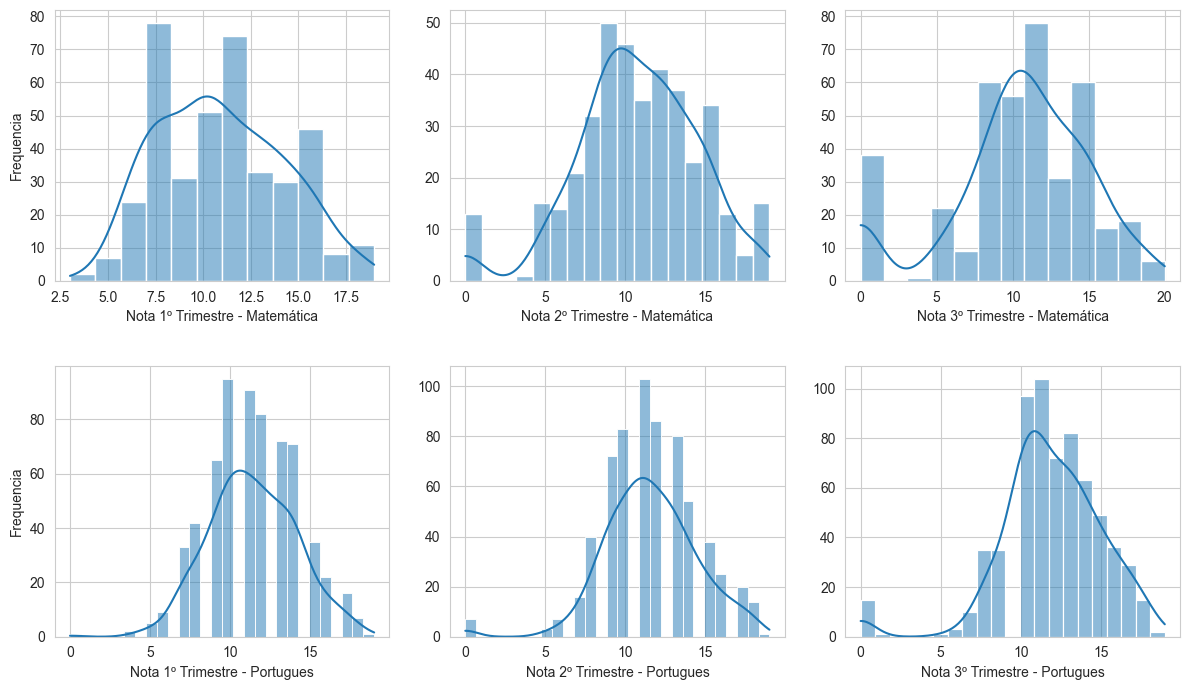

		Gráfico 2 - Hisograma - Frequência de cada nota por trimestre.


In [95]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

sns.histplot(df_mat['G1'], kde=True, ax=axes[0][0])
sns.histplot(df_mat['G2'], kde=True, ax=axes[0][1])
sns.histplot(df_mat['G3'], kde=True, ax=axes[0][2])

sns.histplot(df_por['G1'], kde=True, ax=axes[1][0])
sns.histplot(df_por['G2'], kde=True, ax=axes[1][1])
sns.histplot(df_por['G3'], kde=True, ax=axes[1][2])

axes[0][0].set_xlabel("Nota 1º Trimestre - Matemática")
axes[0][1].set_xlabel("Nota 2º Trimestre - Matemática")
axes[0][2].set_xlabel("Nota 3º Trimestre - Matemática")
axes[1][0].set_xlabel("Nota 1º Trimestre - Portugues")
axes[1][1].set_xlabel("Nota 2º Trimestre - Portugues")
axes[1][2].set_xlabel("Nota 3º Trimestre - Portugues")

axes[0][0].set_ylabel("Frequencia")
axes[0][1].set_ylabel("")
axes[0][2].set_ylabel("")
axes[1][0].set_ylabel("Frequencia")
axes[1][1].set_ylabel("")
axes[1][2].set_ylabel("")

plt.tight_layout(h_pad=3, w_pad=2)
plt.show()

print("\t\tGráfico 2 - Hisograma - Frequência de cada nota por trimestre.")

##### Podemos concluir que, a quantidade de notas baixas aumentam com o passar do ano para ambas as matérias, porém este aumento é muito mais evidente em matemática. Da qual do 2º para o 3º trimestre, o número de alunos que tiraram nota 0 quase triplicaram.

#### Este aumento significativo em matemática mas não tanto em português, pode ser causado pelos aumento da dificuldade da matéria, ou talvez a metodologia adotada pela escola. Outra análise poderá concluir algo correlacionando isso com alguma outra variável disponível.

#### Abaixo temos um gráfico boxplot da quantidade de faltas dos alunos, com o objetivo de analisar outliers.

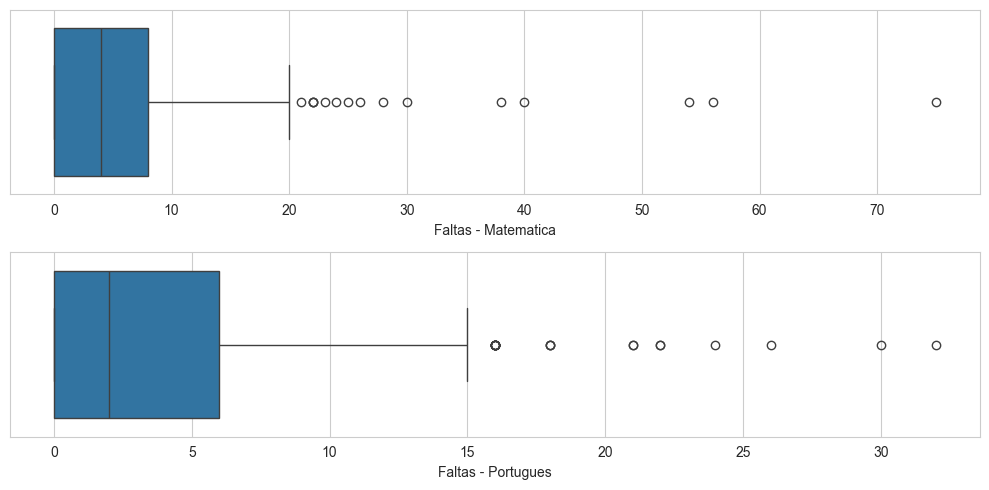

		Gráfico 3 - Boxplot - Outliers de falta.


In [96]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

sns.boxplot(df_mat.absences, orient="h", ax=axes[0])
sns.boxplot(df_por.absences, orient="h", ax=axes[1])

axes[0].set_xlabel("Faltas - Matematica")
axes[1].set_xlabel("Faltas - Portugues")

plt.tight_layout()
plt.show()

print("\t\tGráfico 3 - Boxplot - Outliers de falta.")

#### Podemos tirar duas principais conclusões com os gráficos acima:

1) Alunos faltaram quase duas vezes mais às aulas de matemática do que português.
2) Os alunos que tiveram uma falta muito acima da média, faltaram mais do que o dobro em matemática do que português, ou seja, emquanto temos 2 alunos que faltaram 30 ou 35 vezes me português, temos 5 alunos que faltaram mais de 35, 40, mais de 50 e até mais do que 70 vezes.

#### Essas duas conclusões podem nos ajudar a entender o decaimento das notas de matemática, que embora tanto a nota quanto falta possam consequências de uma outra causa em comum, as faltas tem uma grande chance de ser um fator contribuinte para o decaimento das notas.

### 4.2 - Algumas análises Bivariadas

##### Tendo uma ideia inicial de como as variáveis se comportam e hipotetizando algumas possíveis causas pra esses comportamentos, vejamos como algumas dessas variáveis se comportam com relação à outras.

##### Para isso, podemos pensar em algumas perguntas iniciais simples, que envolvam a nota e alguma variável categórica e não numérica:

1) Será que há uma diferença entre notas dependendo de onde o aluno mora ?
2) Será que há uma diferença entre notas dependendo de se o aluno teve algum suporte ou aula extra ?
3) Será que há uma diferença entre notas dependendo do tamanho e relação familiar dos alunos ?

##### Vamos alinsar algumas dessas questões utilizando gráficos de sino.

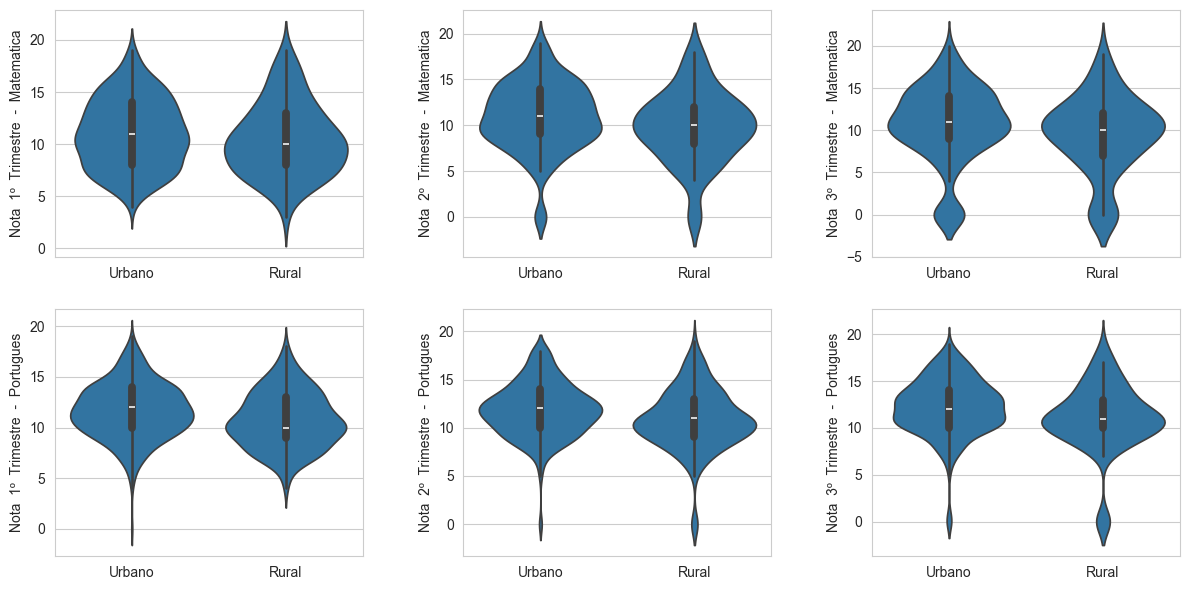

		Gráfico 4 - Violino - Frequência de Notas por tipo de endereço.


In [98]:
showViolinPlot('address')
print("\t\tGráfico 4 - Violino - Frequência de Notas por tipo de endereço.")

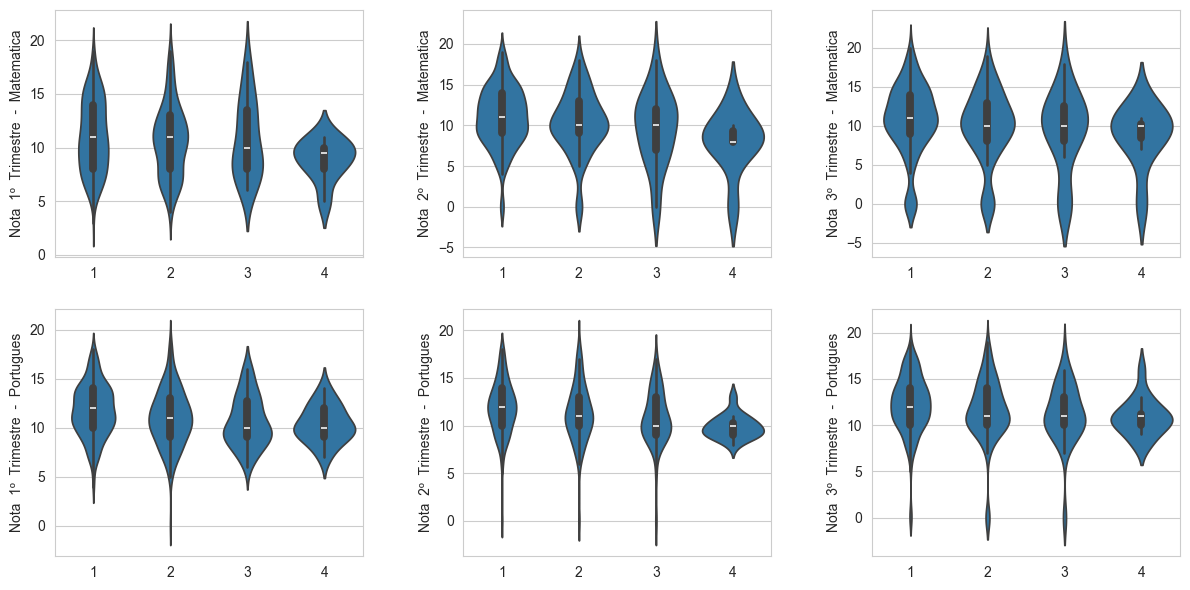

		Gráfico 5 - Violino - Frequência de Notas por tempo de deslocamento.


In [100]:
showViolinPlot('traveltime')
print("\t\tGráfico 5 - Violino - Frequência de Notas por tempo de deslocamento.")

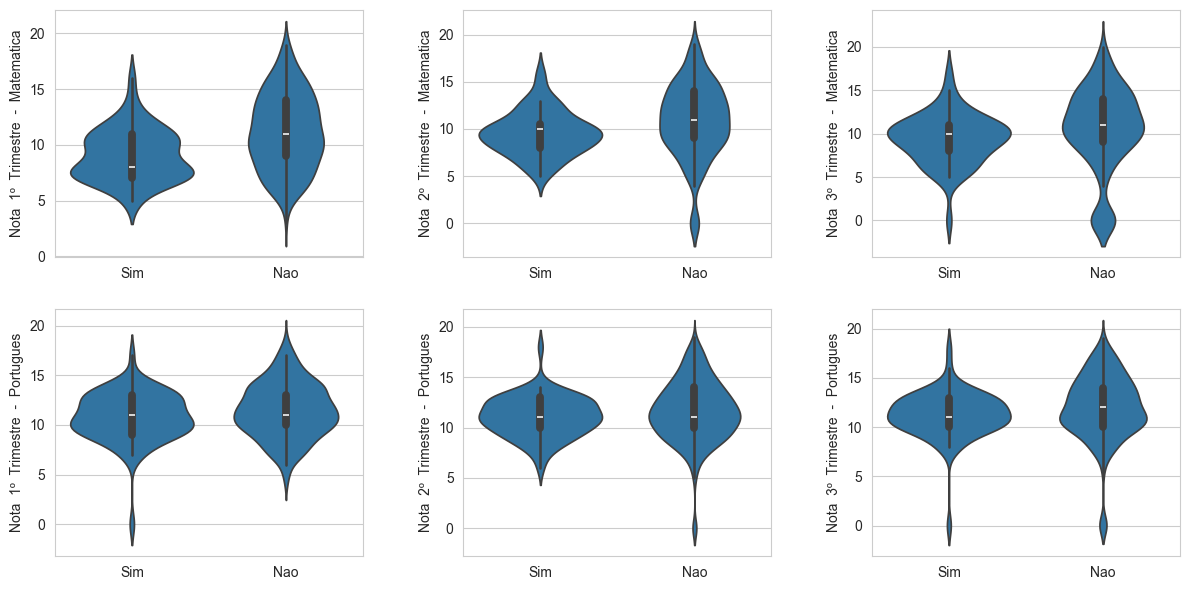

		Gráfico 6 - Violino - Frequência de Notas por suporte educacional.


In [102]:
showViolinPlot('schoolsup')
print("\t\tGráfico 6 - Violino - Frequência de Notas por suporte educacional.")

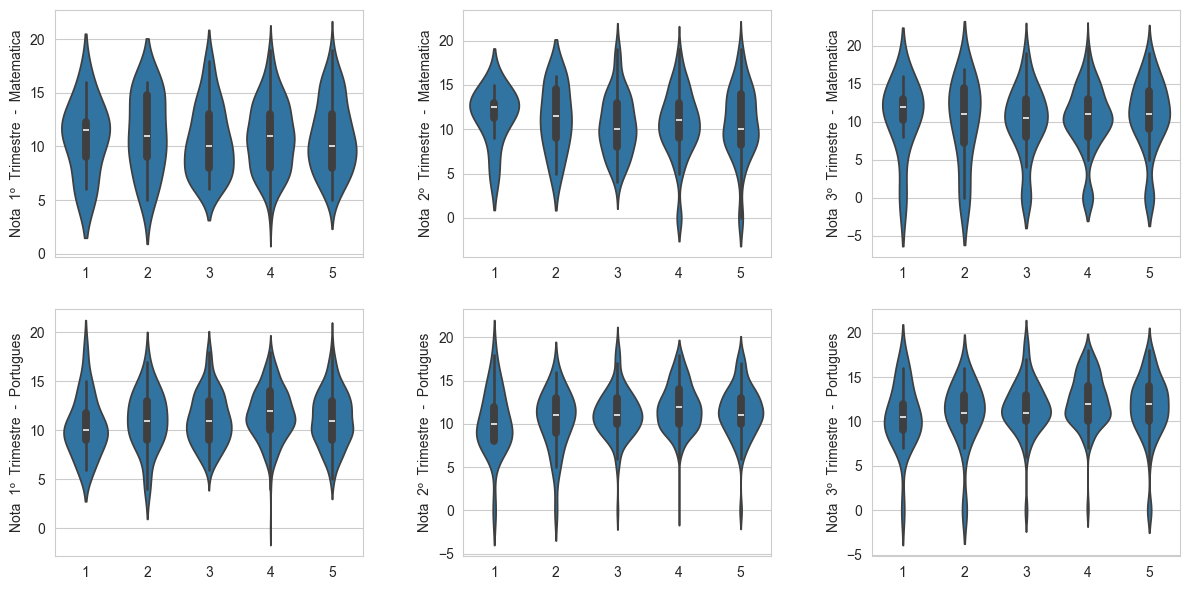

		Gráfico 7 - Violino - Frequência de Notas por relação familiar.


In [103]:
showViolinPlot('famrel')
print("\t\tGráfico 7 - Violino - Frequência de Notas por relação familiar.")

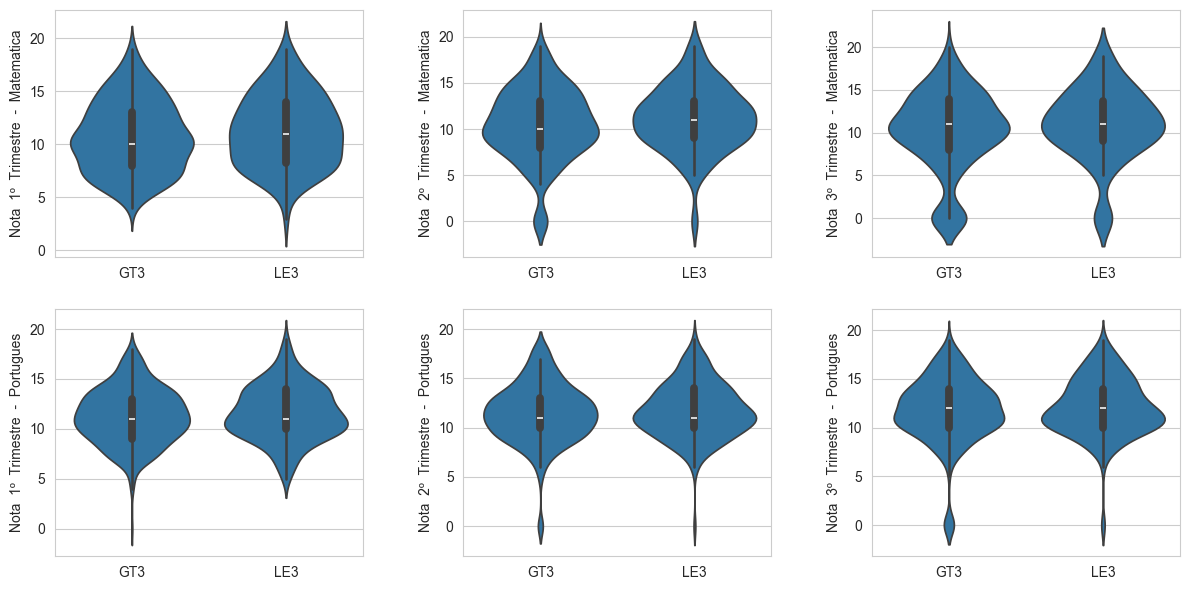

		Gráfico 8 - Violino - Frequência de Notas por tamanho da família.


In [104]:
showViolinPlot('famsize')
print("\t\tGráfico 8 - Violino - Frequência de Notas por tamanho da família.")

##### Os gráficos acima nos permitem tirar algumas conclusões:

1) Confirmação de que as notas, em todos os casos, diminuem ao longo do ano, principalmente em matemática.
2) Alunos que moram em zona urbana tendem a ter uma concentração maior de notas acima da média e uma concentração menor de notas baixas *(Gráfico 4)*.
3) Alunos que levam mais tempo se deslocando de casa para a escola tendem a ter notas menores *(Gráfico 5)*.
4) Alunos com suporte educacional extra tendem a concentrar suas notas entre 7.5 e 10, enquanto alunos sem suporte tem uma frequencia de notas mais distribuidas. Porém apenas no começo do ano, do meio para frente, há um aumento de notas baixas e 0 para os alunos sem suporte *(Gráfico 6)*.
5) A relação familiar do aluno interfere muito pouco para as suas notas, alunos com uma boa relação familiar até demonstram ter uma frequência de notas baixas um pouco maior do que alunos com uma má relação familiar *(Gráfico 7)*.
6) Alunos com família maior de 3 pessoas tem uma maior concentração te notas baixas do que alunos com família menor *(Gráfico 8)*.

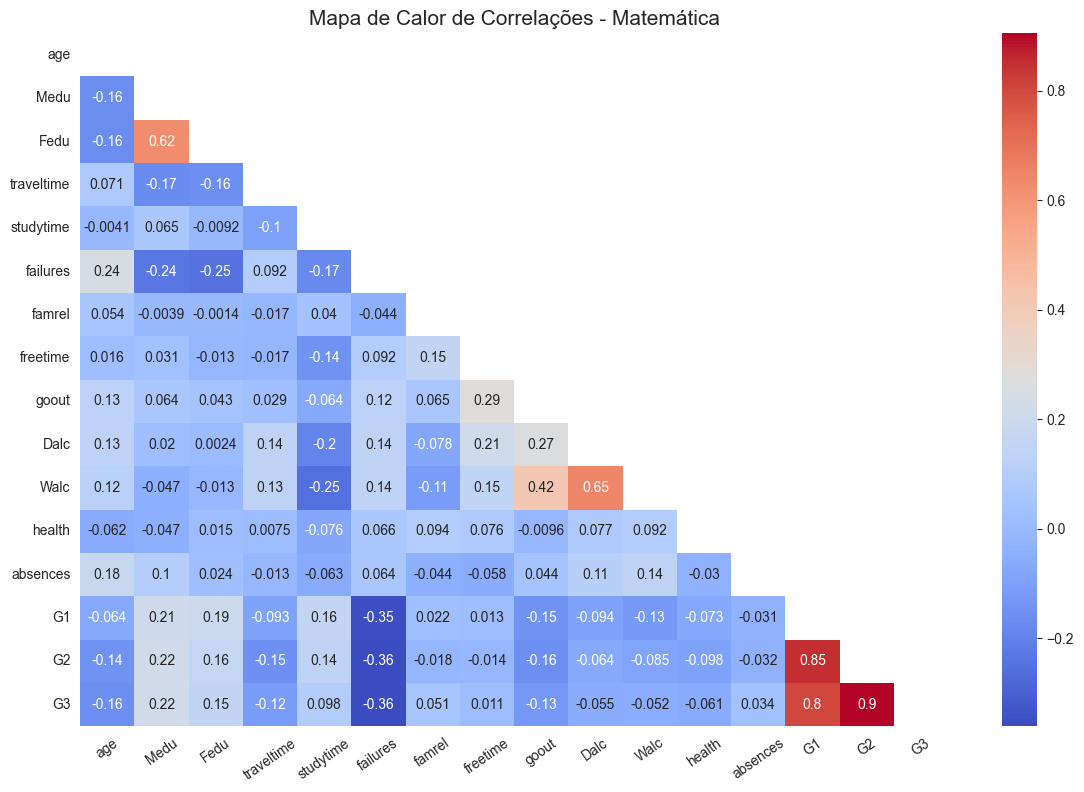

		Gráfico 9 - Mapa de Calor - Correlação das variáveis numéricas de Matemática.


In [123]:
showHeatmap(df_mat, 'Matemática', 'coolwarm')
print("\t\tGráfico 9 - Mapa de Calor - Correlação das variáveis numéricas de Matemática.")

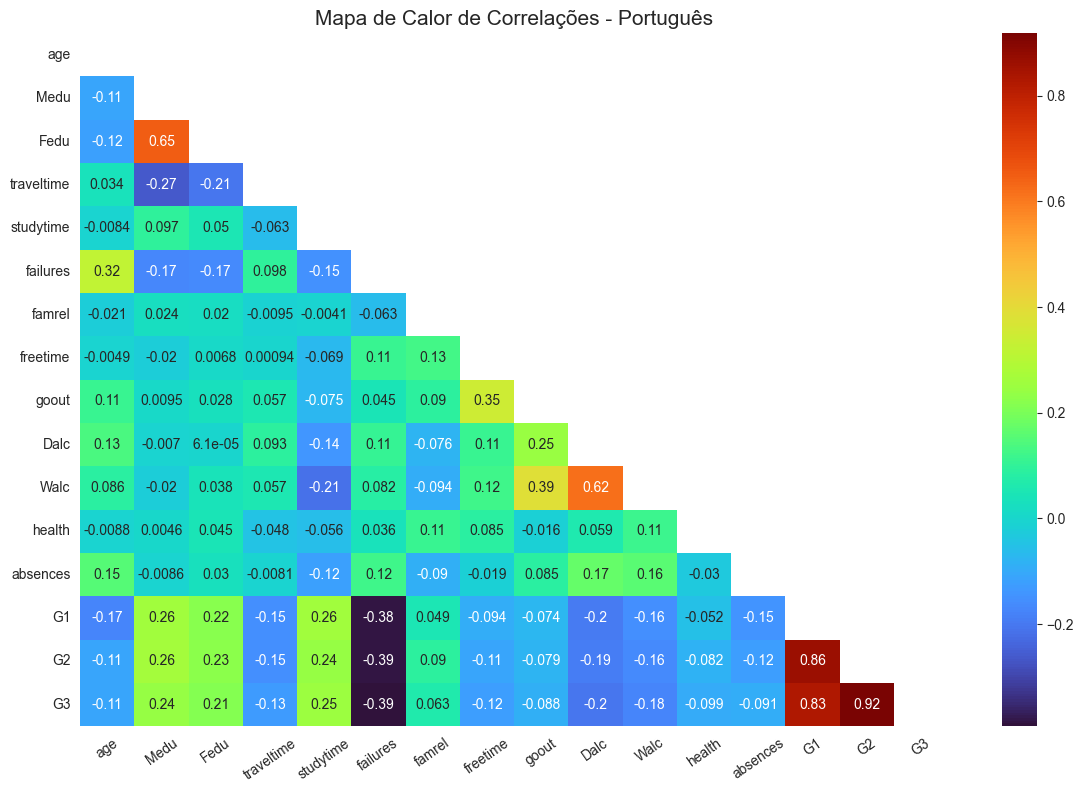

		Gráfico 10 - Mapa de Calor - Correlação das variáveis numéricas de Português.


In [124]:
showHeatmap(df_por, 'Português', 'turbo')
print("\t\tGráfico 10 - Mapa de Calor - Correlação das variáveis numéricas de Português.")

In [127]:
father_ed_prep_mat = df_mat.groupby(['Fedu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Sem escolaridade', 1: 'Ensino Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Ensino Superior'})
father_ed_prep_mat

,G1,G2,G3
Fedu,,,
Sem escolaridade,12.000000,13.000000,13.000000
Ensino Fundamental,9.731707,9.390244,9.158537
Ginásio,11.026087,10.878261,10.260870
Colégio,10.740000,10.750000,10.660000
Ensino Superior,11.927083,11.562500,11.364583


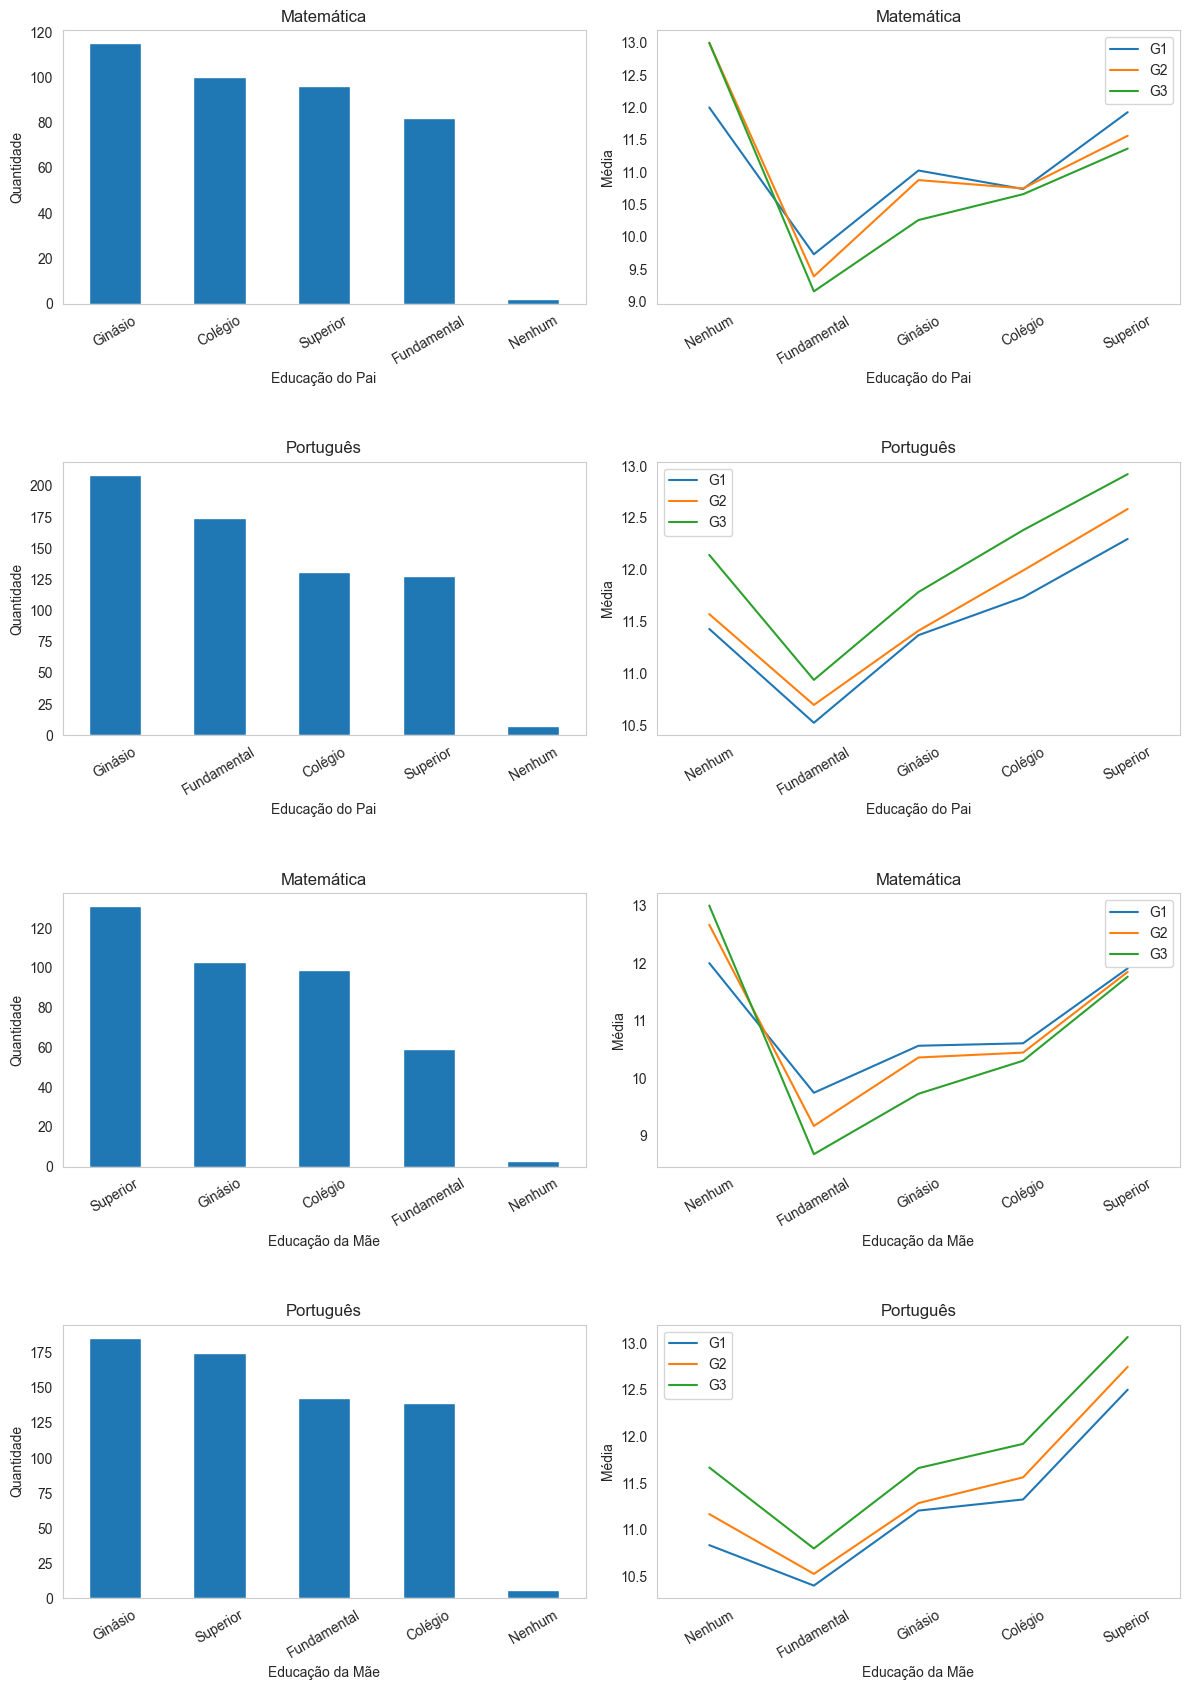

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(12, 17))


bar_father_mat = df_mat['Fedu'].value_counts().reset_index()
bar_father_por = df_por['Fedu'].value_counts().reset_index()
bar_mother_mat = df_mat['Medu'].value_counts().reset_index()
bar_mother_por = df_por['Medu'].value_counts().reset_index()
bar_father_mat['Fedu'] = bar_father_mat['Fedu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
bar_father_por['Fedu'] = bar_father_por['Fedu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
bar_mother_mat['Medu'] = bar_mother_mat['Medu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
bar_mother_por['Medu'] = bar_mother_por['Medu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
father_ed_prep_mat = df_mat.groupby(['Fedu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
father_ed_prep_por = df_por.groupby(['Fedu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
mother_ed_prep_mat = df_mat.groupby(['Medu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
mother_ed_prep_por = df_por.groupby(['Medu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})

bars = [bar_father_mat, bar_father_por, bar_mother_mat, bar_mother_por]
groups = [father_ed_prep_mat, father_ed_prep_por, mother_ed_prep_mat, mother_ed_prep_por]

for i in range(0,4):

    if i in [0,1]:
        parent = 'Fedu'
        label = 'Educação do Pai'
    else:
        parent = 'Medu'
        label = 'Educação da Mãe'
    
    if i%2 == 0: title = 'Matemática'
    else: title = 'Português'
    
    bars[i].plot(kind='bar', x=parent, y='count', ax=axes[i][0], title=title, legend=False)
    axes[i][0].set_xlabel(label)
    axes[i][0].set_ylabel('Quantidade')
    axes[i][0].grid(False)

    groups[i][['G1', 'G2', 'G3']].plot(kind='line', ax=axes[i][1], title=title)
    axes[i][1].set_xlabel(label)
    axes[i][1].set_ylabel('Média')
    axes[i][1].grid(False)

for i in range(0,4):
    for j in range(0,2):

        if j == 1: angle = 30
        else: angle = 30

        label = axes[i][j].get_xticklabels()
        ticks = axes[i][j].get_xticks()
        axes[i][j].set_xticks(ticks)
        axes[i][j].set_xticklabels(label, rotation=angle)

plt.tight_layout(h_pad=4)
plt.show()